### Evaluate Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [28]:
# predict tips
lrm = LinearRegression(normalize = True)
lrm = lrm.fit(df[['total_bill']], df.tip)
df['yhat'] = lrm.predict(df[['total_bill']])
df

,total_bill,tip,sex,smoker,day,time,size,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


In [29]:
# add baseline
df['baseline'] = df.tip.mean()
df

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279


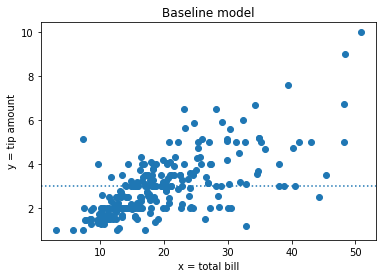

In [30]:
# plot data
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')
plt.xlabel('x = total bill')
plt.ylabel('y = tip amount')
plt.title('Baseline model');

Text(0.5, 1.0, 'Linear Regression model')

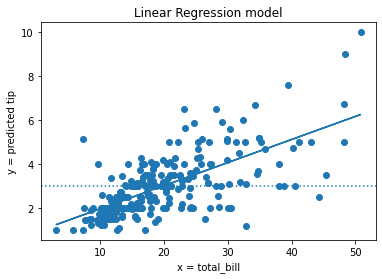

In [33]:
# plot data with prediction
plt.scatter(df.total_bill, df.tip)
plt.plot(df.total_bill, df.yhat)
plt.axhline(df.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = predicted tip')
plt.title('Linear Regression model')

3. Plot the residuals for the linear regression model that you made.

In [40]:
# residual = actual - predicted
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline

df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


Text(0.5, 1.0, 'Linear Regression model')

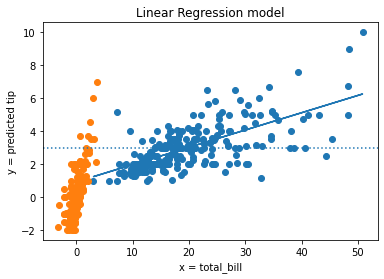

In [41]:
# plot data with prediction
plt.scatter(df.total_bill, df.tip)
plt.scatter(df.residual, df.baseline_residual)
plt.plot(df.total_bill, df.yhat)
plt.axhline(df.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = predicted tip')
plt.title('Linear Regression model')

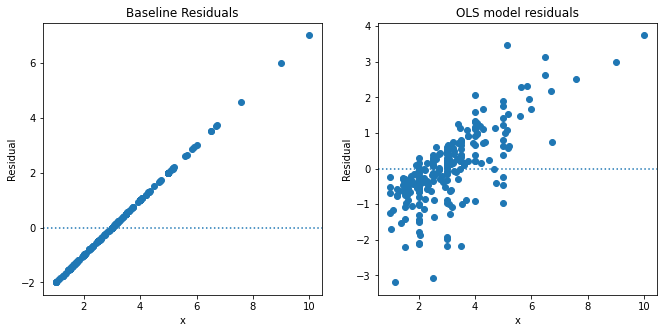

In [42]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.tip, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.tip, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [48]:
# first calculate the square of residuals

df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{}".format(SSE))
print("SSE Baseline =", "{}".format(SSE_baseline))

SSE = 252.788743850776
SSE Baseline = 465.2124770491804


In [53]:
ESS = sum((df.yhat - df.baseline) ** 2)
ESS_baseline = sum((df.baseline - df.baseline) ** 2)
                   
print('ESS =', "{}".format(ESS))
print("ESS Baseline =", "{}".format(ESS_baseline))

ESS = 212.42373319840434
ESS Baseline = 0.0


In [54]:
TSS = SSE + ESS
TSS_baseline = SSE_baseline + ESS_baseline
                   
print('TSS =', "{}".format(TSS))
print('TSS Baseline =', "{}".format(TSS_baseline))

TSS = 465.21247704918034
TSS Baseline = 465.2124770491804


In [49]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{}".format(MSE))
print("MSE baseline = ", "{}".format(MSE_baseline))

MSE =  1.036019442011377
MSE baseline =  1.906608512496641


In [50]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", "{}".format(RMSE))
print("RMSE baseline = ", "{}".format(RMSE_baseline))

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298954


5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [55]:
print("SSE Baseline =", "{}".format(SSE_baseline))
print("ESS Baseline =", "{}".format(ESS_baseline))
print('TSS Baseline =', "{}".format(TSS_baseline))
print("MSE baseline = ", "{}".format(MSE_baseline))
print("RMSE baseline = ", "{}".format(RMSE_baseline))

SSE Baseline = 465.2124770491804
ESS Baseline = 0.0
TSS Baseline = 465.2124770491804
MSE baseline =  1.906608512496641
RMSE baseline =  1.3807999538298954


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [59]:
mod_eval = pd.DataFrame(np.array(['SSE', 'ESS', 'TSS', 'MSE', 'RMSE']), columns = ['metric'])
mod_eval['model_error'] = np.array([SSE, ESS, TSS, MSE, RMSE])
mod_eval['baseline_error'] = np.array([SSE_baseline, ESS_baseline, TSS_baseline, MSE_baseline, RMSE_baseline])

In [62]:
mod_eval['better_than_baseline'] = mod_eval.baseline_error > mod_eval.model_error
mod_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,ESS,212.423733,0.000000,False
2,TSS,465.212477,465.212477,True
3,MSE,1.036019,1.906609,True
4,RMSE,1.017850,1.380800,True


7. What is the amount of variance explained in your model?

In [63]:
R2 = ESS / TSS
print('R-squared =', R2)
print('Percent of variance in y explained by x = ', R2*100)

R-squared = 0.4566165863516764
Percent of variance in y explained by x =  45.66165863516764


8. Is your model better than the baseline model?

In [ ]:
# yes

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
   
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [86]:
def sse(y, yhat):
    return (residuals(y, yhat) ** 2).sum()

def mse(y, yhat):
    n = y.shape[0]
    return sse(y, yhat) / n

def rmse(y, yhat):
    return (mse(y, yhat)) ** .5

def ess(y, yhat):
    return ((yhat - y.mean()) ** 2).sum()

def tss(y):
    return ((y - y.mean()) ** 2).sum()

def r2_score(y, yhat):
    return ess(y, yhat) / tss(y)

def regression_errors(y, yhat):
    return pd.Series({
        'sse': sse(y, yhat),
        'ess': ess(y, yhat),
        'tss': tss(y),
        'mse': mse(y, yhat),
        'rmse': rmse(y, yhat),
    })

def baseline_mean_errors(y):
    yhat = y.mean()
    return {
        'sse': sse(y, yhat),
        'mse': mse(y, yhat),
        'rmse': rmse(y, yhat),
    }

def better_than_baseline(y, yhat):
    rmse_baseline = rmse(y, y.mean())
    rmse_model = rmse(y, yhat)
    return rmse_model < rmse_baseline

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [64]:
mpg_df = sns.load_dataset('mpg')
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [70]:
lrm = LinearRegression(normalize = True)
lrm = lrm.fit(mpg_df[['displacement']], mpg_df.mpg)
mpg_df['yhat'] = lrm.predict(mpg_df[['displacement']])
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,yhat
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,16.668052
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,14.075908
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,16.004945
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,16.848899
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,16.969464
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,26.735213
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,29.327357
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,27.036625
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,27.940861


In [71]:
# add baseline
mpg_df['baseline'] = mpg_df.mpg.mean()
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,yhat,baseline
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,16.668052,23.514573
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,14.075908,23.514573
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,16.004945,23.514573
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,16.848899,23.514573
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,16.969464,23.514573
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,26.735213,23.514573
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,29.327357,23.514573
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,27.036625,23.514573
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,27.940861,23.514573


In [73]:
mpg_df['residual'] = residuals(mpg_df.mpg, mpg_df.yhat)
mpg_df['baseline_residual'] = baseline_residuals(mpg_df.mpg, mpg_df.baseline)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,yhat,baseline,residual,baseline_residual
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,16.668052,23.514573,1.331948,-5.514573
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,14.075908,23.514573,0.924092,-8.514573
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,16.004945,23.514573,1.995055,-5.514573
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,16.848899,23.514573,-0.848899,-7.514573
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,16.969464,23.514573,0.030536,-6.514573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,26.735213,23.514573,0.264787,3.485427
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,29.327357,23.514573,14.672643,20.485427
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,27.036625,23.514573,4.963375,8.485427
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,27.940861,23.514573,0.059139,4.485427


In [87]:
SSE = sse(mpg_df.mpg, mpg_df.yhat)
MSE = mse(mpg_df.mpg, mpg_df.yhat)
RMSE = rmse(mpg_df.mpg, mpg_df.yhat)
ESS = ess(mpg_df.mpg, mpg_df.yhat)
TSS = tss(mpg_df.mpg)
R2 = r2_score(mpg_df.mpg, mpg_df.yhat)
regression_err = regression_errors(mpg_df.mpg, mpg_df.yhat)
baseline_err = baseline_mean_errors(mpg_df.mpg)

In [88]:
print('SSE =', SSE)
print('')
print('MSE =', MSE)
print('')
print('RMSE =', RMSE)
print('')
print('ESS =', ESS)
print('')
print('TSS =', TSS)
print('')
print('R-squared =', R2)
print('')
print('Regression Errors =', regression_err)
print('')
print('Baseline Errors =', baseline_err)

SSE = 8567.411859443035

MSE = 21.526160450861898

RMSE = 4.6396293441245815

ESS = 15685.163617943897

TSS = 24252.575477386934

R-squared = 0.6467421834257859

Regression Errors = sse      8567.411859
ess     15685.163618
tss     24252.575477
mse        21.526160
rmse        4.639629
dtype: float64

Baseline Errors = {'sse': 24252.575477386934, 'mse': 60.93611928991692, 'rmse': 7.806159061274432}


In [89]:
better_than_baseline(mpg_df.mpg, mpg_df.yhat)

True